# Covid Data Analysis

## Contents

* About
    * Project Development
    * Problem Definition
    * Objective
* Data
    * Libraries
    * Importing
    * Variables
    * Important Definitions
* Exploratory Data Analysis (EDA)
    * Plotting Objectives
    * Functions
    * Shape and Size
    * Types
    * Missing Values
    * Numeric
        * Numeric Variables (both Continuous and Discrete)
            * Summary statistics
            * Probability Distribution
            * Outliers Detection and Treatment & Inconsistencies
* Questions

## About

### Project Development
This project was developed locally with Visual Studio Code and GitHub version control.

Please check this project @ [GitHub page](https://caiocvelasco.github.io/) or @ [GitHub Repository - Cardio Data Analysis](https://github.com/caiocvelasco/health-data-analysis/blob/a4fafbcd8148a6d501f42a10ae9d313fc3b268e1/cardio-data-analysis-project.ipynb).

### Problem Definition

A client would like to understand some important patients' covid-related descriptive statistics.

### Objective
Our goal is to calculate some descriptive statistics.

## Data
Data was already available on a _csv_ format.

### Libraries

In [127]:
# !pip install seaborn pandas matplotlib numpy
import pandas as pd              # for data analysis
import numpy as np               # for scientific computing
import scipy                     # for scientific computing
import scipy.stats as stats      # for scientific computing

import os                        # for file interactions in the user's operating system
import warnings                  # for dealing with warning messages if need be
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns            # for data visualization

### Importing

In [128]:
# Basic Settings
csv_folder_name = "health_dataset"  # please, change the folder name (where the CSV files are stored) if need be
notebook_location = "C:\\Users\\caiov\\OneDrive - UCLA IT Services\\Documentos\\DataScience\\Datasets" # set the location where this notebook is saved
csv_folder_path = notebook_location + "\\" + csv_folder_name  # set path for the CSV files
os.chdir(csv_folder_path)                                     # set location of CSV files

# Save CVSs Data on a Pandas Dataframe and Parse Date Column
df_covid_data = pd.read_csv("covid_data.csv", sep = ",", skipinitialspace = True, parse_dates = ["date"]) #skip space after delimiter if need be

# Save a Copy of the Dataframe
data     = df_covid_data.copy()

# Dataset Manipulation
data.name = "Covid Dataset" # rename the dataset
cols      = data.columns;              # create an index list with feature names

# Quick Overview of a Sample from the Data
pd.set_option('display.max_columns', None) # changing the max_columns value
data.head().T

,0,1,2,3,4
location,Afghanistan,Afghanistan,Afghanistan,Afghanistan,Afghanistan
date,2019-12-31 00:00:00,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00
new_cases,0,0,0,0,0
new_deaths,0,0,0,0,0
population,38928341.0,38928341.0,38928341.0,38928341.0,38928341.0
aged_65_older_percent,2.581,2.581,2.581,2.581,2.581
gdp_per_capita,1803.987,1803.987,1803.987,1803.987,1803.987
hospital_beds_per_thousand,0.5,0.5,0.5,0.5,0.5


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


### Variables

In [130]:
# Store the relevant Categorical Variables for analysis on a list
## There is no categorical variables.

# Store the relevant Numeric Variables for analysis on a list
num_cols = ['new_cases', 'new_deaths', 'population', 'aged_65_older_percent', 'gdp_per_capita', 'hospital_beds_per_thousand']     


## Exploratory Data Analysis (EDA)

### Plotting Objectives
Before diving into the EDA, it is good to have a clear goal in mind. Our goal is to calculate some descriptive statistics.

Given our goal, the following points should help explore and visualize data accordingly:
 * Check features and their distributions, unidimensionally.
 * Check correlation between features, bidimensionally.

### Defining Functions for EDA

In [131]:
### DATA ANALYSIS PART ###

# Checking Shape
def data_shape(data):
    print("Dataset shape: " + str(data.shape[0]) + " observations and " + str(data.shape[1]) + " features.")

# Check Size
def data_size(data):
    print("This dataset has a total of: " + str(data.size) + " entries.")

# Check Information
def data_info(data):
    print(data.name)
    print("--------------------------------------")
    data.info()
    print("--------------------------------------")  

def negative_values(neg_cols, data):
    for col in neg_cols:
        data[col][data[cols] < 0] = np.nan

# Check for Duplicates
def duplicated_rows(data):
    print("There are: " + str(data.duplicated(keep='first').sum()) + " duplicated observations (not including first unique ocurrence).")

# Check for Missing Values
def missing_values(data):
    print('Checking for missing values in the', data.name) # data.name has been defined previously in the "Importing" section
    print('------------------------------------------------------------')
    print(data.isna().sum())
    print('------------------------------------------------------------')

# Get Unique Values
def unique_values(data, columns_list):                      # define a function (output: unique values for categorical variables on the numeric format 'int')
    for i in columns_list:                                   # cols is the list of features from this dataset defined in the section above
        print('Unique values in', i, 'are', data[i].unique()) # calls function unique() to find get unique values
        print('----------------------------------------------------------------------------------------------------')


# Save Data - Numeric & Continuous Variables
def save_num_data(data, columns_list):
    num_data = data[columns_list]
    num_data.name = "Cardio Base Dataset - Numerical Variables" # rename the dataset
    return num_data

# IQR Method - Detecting Outliers
def iqr_method(potential_outliers, data): #arg 1 takes list of features with potential outliers, arg2 
    i = 1
    for col in potential_outliers:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        print(f'column {i}: {data[col].name}\n------------------------')
        print('1st quantile => ',Q1)
        print('3rd quantile => ',Q3)
        print('IQR =>',IQR)

        lower_bound  = Q1-(1.5*IQR)
        print('lower_bound => ' + str(lower_bound))

        upper_bound = Q3+(1.5*IQR)
        print('upper_bound => ' + str(upper_bound))
        print("\n------------------------")
        
        i = i + 1

        data[col][(data[col] < lower_bound) | (data[col] > upper_bound)] = np.nan  # replacing outliers with NaN

# Outliers Method - For Numerical Variables
def bound_method(data):
    for col in data:
        data[col][ (data[col] > data[col].quantile(0.975)) | (data[col] < data[col].quantile(0.025))] = np.nan  # replacing outliers with NaN

### VISUALIZATION PART ###

# Plot Probability Distributions - Continuous Variables
def pdf_plot_cont(data):
    for i in data:
        ax = sns.displot(data[i], kind="kde")
        plt.show()

# Plot Box Plots - Continuous Variables with Groups
def box_plot(data): # the first argument takes a list of features and the second the dataset
    for i in data:
        ax = sns.boxplot(x = data[i], orient = 'h')
        plt.show()

### Shape and Size

In [132]:
# Check Shape and Size
data_shape(data) # calls shape function
data_size(data)  # calls size function

Dataset shape: 23082 observations and 8 features.
This dataset has a total of: 184656 entries.


### Types

In [133]:
# Check Data Type
data_info(data) # calls info function

Covid Dataset
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB
--------------------------------------


All features have the expected type.

In [134]:
# Decriptive Statistics
data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


There are some negative values for new_cases new_deaths, we need to get rid of those.

In [135]:
# Replace Negative Values with Missing values

data['new_cases'][data['new_cases'] < 0] = np.nan
data['new_deaths'][data['new_deaths'] < 0] = np.nan

data.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23068.000000,23080.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,625.450841,35.718977,1.037003e+08,9.758570,22708.384791,3.204687
std,5518.888681,330.750398,6.716897e+08,6.445662,21187.826121,2.593700
min,0.000000,0.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


### Duplicated Values
Let's check for duplicated observations.

In [136]:
# Check for duplicates
duplicated_rows(data)

There are: 0 duplicated observations (not including first unique ocurrence).


### Missing Values

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23068 non-null  float64       
 3   new_deaths                  23080 non-null  float64       
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.4+ MB


In this dataset, there seem to be some missing values in the N/A format.

In [138]:
# Check for missing values (before treating for outliers)
missing_values(data) # calls missing values function

Checking for missing values in the Covid Dataset
------------------------------------------------------------
location                         0
date                             0
new_cases                       14
new_deaths                       2
population                      64
aged_65_older_percent         2439
gdp_per_capita                2371
hospital_beds_per_thousand    3938
dtype: int64
------------------------------------------------------------


In [139]:
# Drop missing values
data.dropna(inplace = True)

# Check for missing values (before treating for outliers)
missing_values(data) # calls missing values function

Checking for missing values in the Covid Dataset
------------------------------------------------------------
location                      0
date                          0
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64
------------------------------------------------------------


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18315 entries, 0 to 23017
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    18315 non-null  object        
 1   date                        18315 non-null  datetime64[ns]
 2   new_cases                   18315 non-null  float64       
 3   new_deaths                  18315 non-null  float64       
 4   population                  18315 non-null  float64       
 5   aged_65_older_percent       18315 non-null  float64       
 6   gdp_per_capita              18315 non-null  float64       
 7   hospital_beds_per_thousand  18315 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.3+ MB


### Numeric Variables

In [141]:
# Save numeric dataset into a new dataset for later use
num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Quick Overview
num_data.sample(5)

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
3618,0.0,0.0,16718971.0,4.412,3645.070,0.80
10440,18.0,9.0,4937796.0,13.928,67335.293,2.96
2275,202.0,82.0,11589616.0,18.571,42658.576,5.64
9405,33.0,4.0,9660350.0,18.577,26777.561,7.02
10287,0.0,0.0,4937796.0,13.928,67335.293,2.96


#### Summary Statistics

In [142]:
# Summary Statistics - Numerical Variables
num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,18315.0,7.848802e+02,6.183781e+03,0.000,0.000,6.000000e+00,9.800000e+01,1.335100e+05
new_deaths,18315.0,4.488152e+01,3.707217e+02,0.000,0.000,0.000000e+00,2.000000e+00,1.052000e+04
population,18315.0,1.269424e+08,7.510070e+08,97928.000,4105268.000,1.070898e+07,4.373376e+07,7.794799e+09
aged_65_older_percent,18315.0,1.015637e+01,6.461980e+00,1.144,4.469,8.153000e+00,1.541300e+01,2.704900e+01
gdp_per_capita,18315.0,2.333663e+04,2.123623e+04,661.240,7485.013,1.627767e+04,3.522008e+04,1.169356e+05
hospital_beds_per_thousand,18315.0,3.126497e+00,2.455429e+00,0.100,1.380,2.600000e+00,4.210000e+00,1.305000e+01


#### Probability Distributions

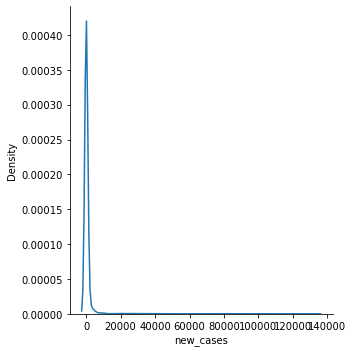

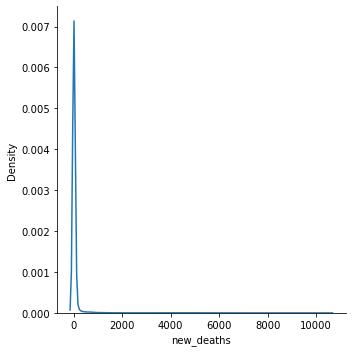

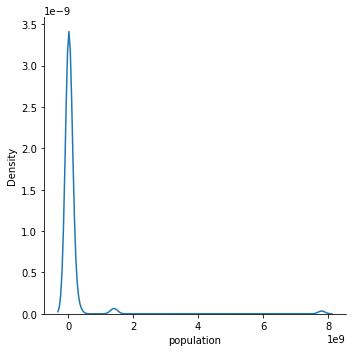

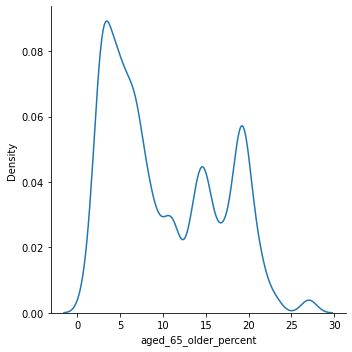

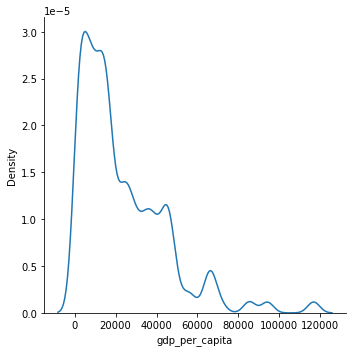

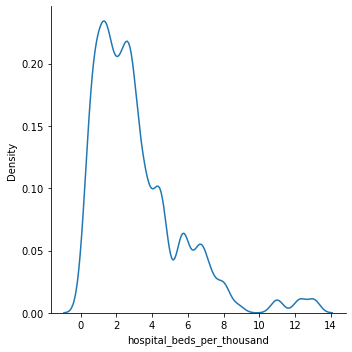

In [143]:
#### Probability Distributions (PDFs) - Numerical Variables
pdf_plot_cont(num_data) # calls pdf plot function

All features are okay. Only population seems to be strongly skewed to the right, let's focus on this.

This information is important because it supports the methods we use for:
* Outliers Detection and Treatment

#### Outliers Detection and Treatment & Inconsistencies

Outliers can be found due to variation within the data (i.e., due to an unexpected large variance in a feature) or due to mistakes. Both cases can be dealt with. We started by looking at the probability distribution of those features and we noticed their skewness, which might indicated possible candidate features for outliers. We also looked at the summary statistics which also show unexpected values.

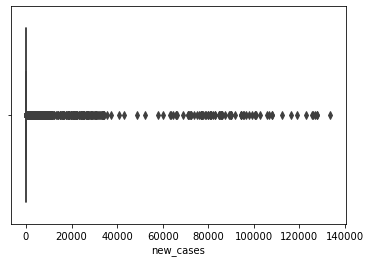

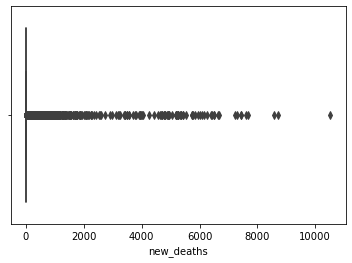

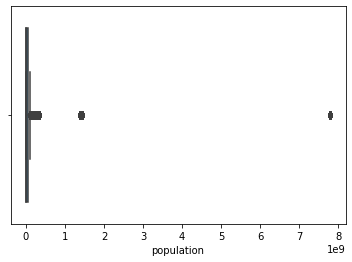

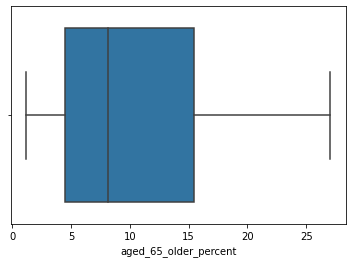

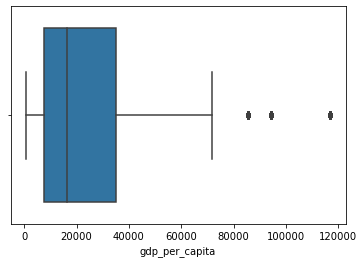

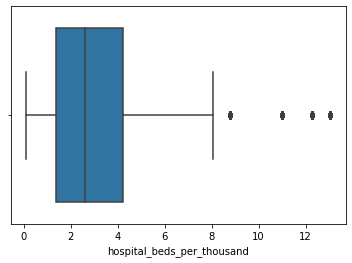

In [144]:
# Boxplots (before treating for outliers) - Numerical Variables
box_plot(num_data)

As a simple rule, we will use the IQR method.

In [145]:
potential_outliers = ['population']
# Calls the IQR Method
iqr_method(potential_outliers, data)

column 1: population
------------------------
1st quantile =>  4105268.0
3rd quantile =>  43733759.0
IQR => 39628491.0
lower_bound => -55337468.5
upper_bound => 103176495.5

------------------------


In [146]:
# Drop missing values
data.dropna(inplace = True)

# Save New Numeric Dataset without outliers as Missing Values
new_num_data = save_num_data(data, num_cols) # calls save_num_data function and stores output

# Summary Statistics - New Numerical Variables without outliers
new_num_data.describe().T

,count,mean,std,min,25%,50%,75%,max
new_cases,16351.0,1.965567e+02,6.694133e+02,0.000,0.000,5.000,7.100000e+01,1.153600e+04
new_deaths,16351.0,1.346120e+01,7.415979e+01,0.000,0.000,0.000,2.000000e+00,2.004000e+03
population,16351.0,1.961215e+07,2.358858e+07,97928.000,3280815.000,9660350.000,2.913681e+07,1.023344e+08
aged_65_older_percent,16351.0,1.021501e+01,6.477061e+00,1.144,4.412,8.153,1.656900e+01,2.302100e+01
gdp_per_capita,16351.0,2.401950e+04,2.180439e+04,661.240,7611.994,16745.022,3.593837e+04,1.169356e+05
hospital_beds_per_thousand,16351.0,3.120990e+00,2.276615e+00,0.100,1.500,2.600,4.210000e+00,1.227000e+01


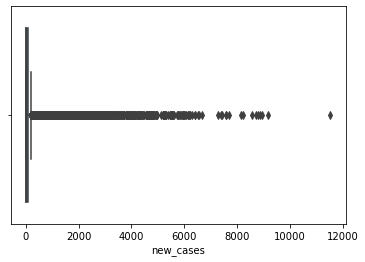

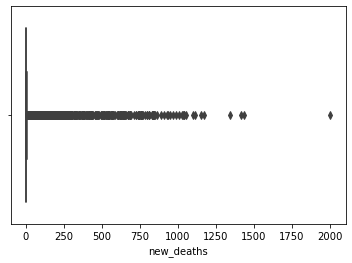

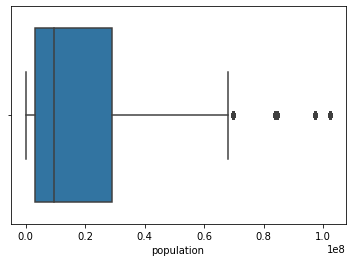

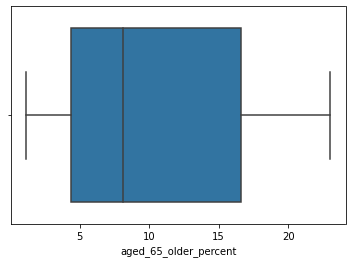

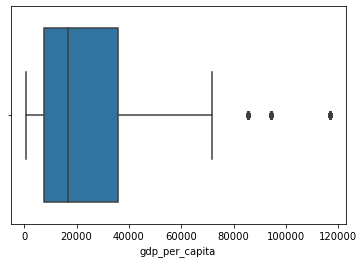

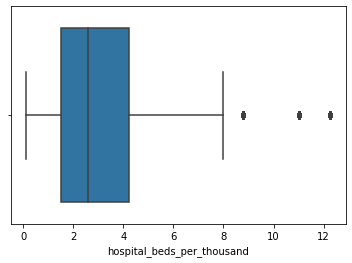

In [147]:
# Boxplots (after treating for outliers) - Numerical Variables
box_plot(new_num_data)

In [148]:
# Check for missing values (after treating for outliers) - Numeric Variables
missing_values(new_num_data) # calls missing values function

Checking for missing values in the Cardio Base Dataset - Numerical Variables
------------------------------------------------------------
new_cases                     0
new_deaths                    0
population                    0
aged_65_older_percent         0
gdp_per_capita                0
hospital_beds_per_thousand    0
dtype: int64
------------------------------------------------------------


## Questions

### Question 09
When did the difference in the total number of confirmed cases between Italy and Germany become more than 10 000?

**ANSWER: 2020-03-12**


In [149]:
# Create new Datasets with Italy and Germany
data_q09_italy   = data[data['location'] == 'Italy']
data_q09_germany = data[data['location'] == 'Germany']

# Sort dataset by dates and locations
data_q09_italy.sort_values(  by = ['date', 'location'], inplace = True, ascending = True)
data_q09_germany.sort_values(by = ['date', 'location'], inplace = True, ascending = True)

# Create Columns with Cumulative Sum of Total Number of Confirmed Cases
data_q09_italy['cum_sum_new_cases']   = data_q09_italy['new_cases'].cumsum()
data_q09_germany['cum_sum_new_cases'] = data_q09_germany['new_cases'].cumsum()

# Merge Datasets on Date (inner join)
data_italy_germany = data_q09_italy.merge(data_q09_germany, on = ['date'], how = 'inner')

# Select only the columns we want 
data_italy_germany = data_italy_germany[['date', 'cum_sum_new_cases_x', 'cum_sum_new_cases_y']]

# Create Columns with the absolute difference between total confirmed cases
data_italy_germany['covid_diff'] = abs( data_italy_germany['cum_sum_new_cases_x'] - data_italy_germany['cum_sum_new_cases_y'])

#Select the minimum value of the condition we want 
date_covid_dif = data_italy_germany['date'][data_italy_germany['covid_diff'] > 10000].min()
print("The date when the difference in the total number of confirmed cases between Italy and Germany become more than 10 000 is: " + str(date_covid_dif))


The date when the difference in the total number of confirmed cases between Italy and Germany become more than 10 000 is: 2020-03-12 00:00:00


### Question 10
Look at the cumulative number of confirmed cases in Italy between 2020-02-28 and 2020-03-20. Fit an exponential function (y = Ae^(Bx)) to this set to express cumulative cases as a function of days passed, by minimizing squared loss. What is the difference between the exponential curve and the total number of real cases on 2020-03-20?

**ANSWER: **


### Question 11
Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.

To compute the Death rate, I will use the mean of the population for each country.

**ANSWER: United Kingdom (597 deaths per million inhabitants)**

In [239]:
# Create Series with Total Deaths
df_loc_death = data.groupby('location')['new_deaths'].sum().to_frame(name = 'total_deaths').reset_index()
df_loc_death.drop_duplicates(subset=['location', 'total_deaths'] , inplace=True)


# Create dataframe with mean population per country
df_pop_per_country = data.groupby('location')['population'].mean().reset_index()


# Create Final Dataframe
data_q11 = df_loc_death
data_q11['death_rate_per_million'] = 1000000 * df_loc_death['total_deaths']/df_pop_per_country['population']

# Get answer
data_q11.sort_values(by = ['death_rate_per_million'], inplace = True, ascending = False)
data_q11.head(3)

,location,total_deaths,death_rate_per_million
13,Belgium,9619.0,829.967102
118,Spain,28644.0,612.643203
136,United Kingdom,40520.0,596.882975


### Question 12
What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the necessary information is missing!

**ANSWER: **


### Question 13
What is the probability that a country has GDP over $10 000, if we know that they have at least 5 hospital beds per 1000 inhabitants.

**ANSWER: 91%**


In [259]:
# Create the subset we want
data_q13 = data[['gdp_per_capita','hospital_beds_per_thousand']]
data_q13 = data_q13[data_q13['hospital_beds_per_thousand'] >= 5]

# Calculate the Probabiilty
data_q13['gdp_per_capita'][data_q13.gdp_per_capita > 10000].count() / data_q13.gdp_per_capita.count()

# sum = data_q13['gdp_per_capita'][data_q13.gdp_per_capita > 10000].sum()
# count = data_q13.gdp_per_capita.count()
# answer_q13 = sum/count
# answer_q13

0.910300136425648